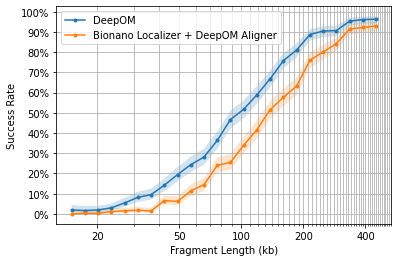

In [4]:
from deepom.bionano_compare import *
from deepom.bionano_utils import *

report_a = BionanoCompareReport()
report_a.run_name = "20221022T000533Z"
report_a.read_compute_results()
report_a.plot_compare()

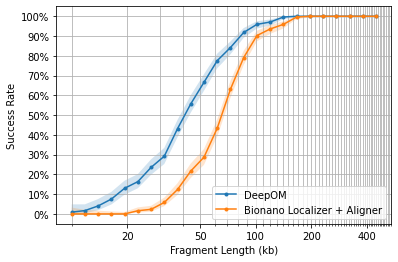

In [5]:
from deepom.bionano_compare import *

report_b = BionanoCompareReport()
report_b.run_name = "20221022T102917Z"
report_b.read_compute_results()
report_b.plot_compare()

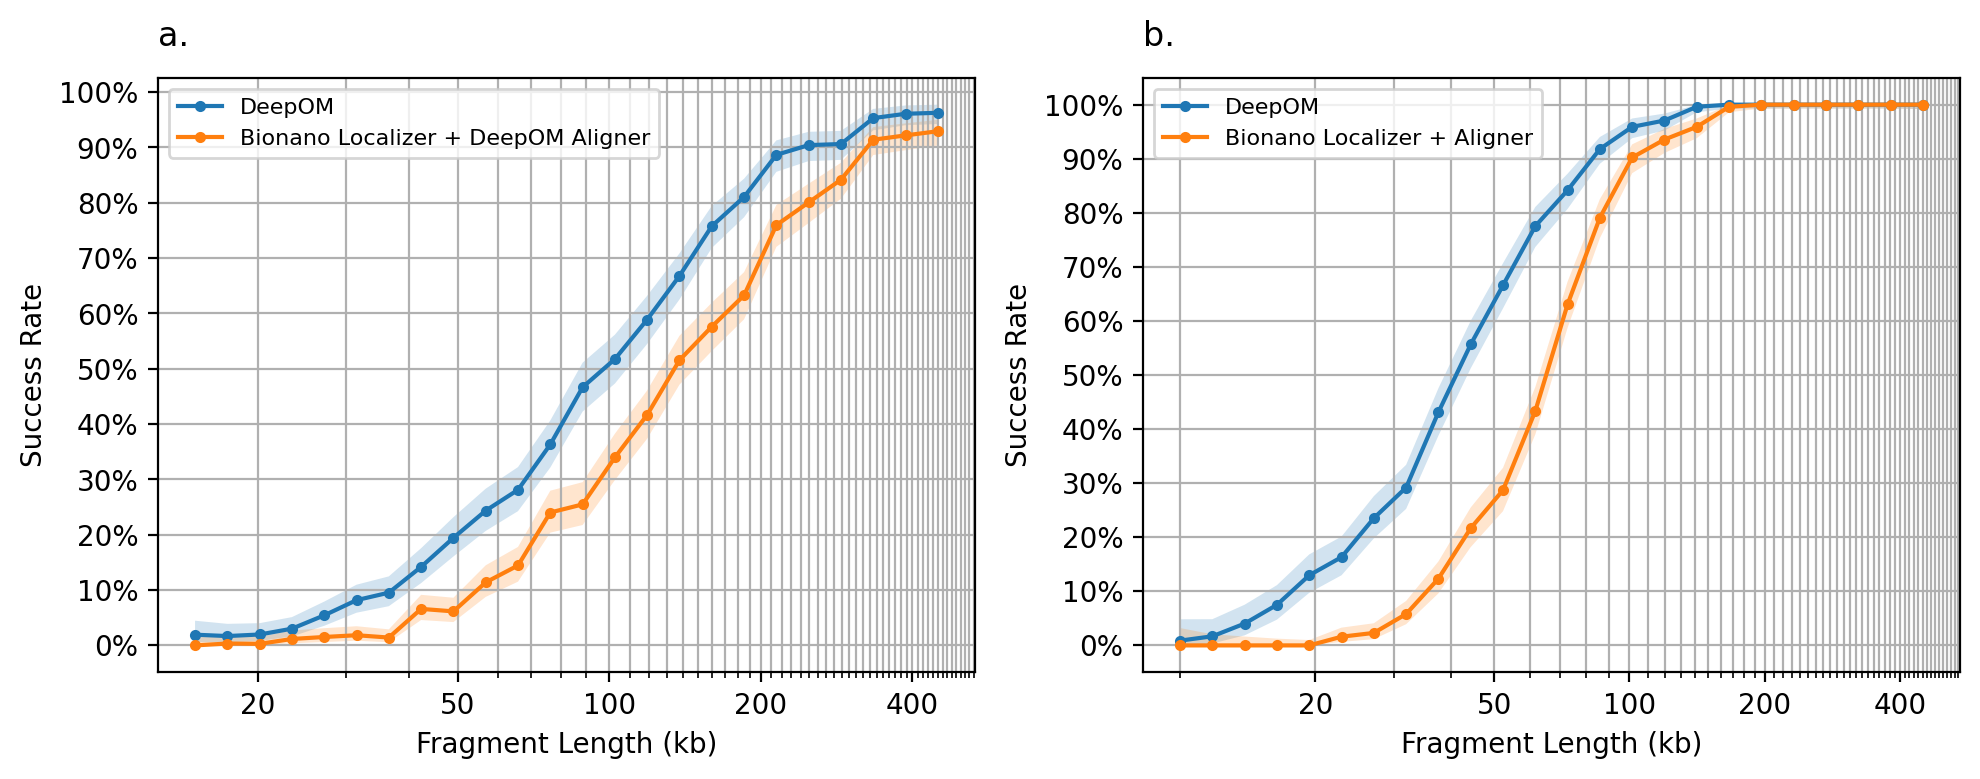

In [3]:
from pathlib import Path

_, axs = pyplot.subplots(figsize=(10, 4), dpi=200, ncols=2)

title_kw = dict(loc="left", y=1.1, pad=-10, fontdict={"color": "k"})
pyplot.sca(axs[0])

pyplot.title("a.", **title_kw)
report_a.plot_compare()

pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano Localizer + DeepOM Aligner"],
    fontsize=8,
)

pyplot.sca(axs[1])

pyplot.title("b.", **title_kw)
report_b.plot_compare()

pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano Localizer + Aligner"],
    fontsize=8,
)

pyplot.tight_layout()
for ext in [".pdf"]:
    pyplot.savefig(Path("../../DeepOM-Paper/figures") / ("benchmark_figure" + ext), bbox_inches='tight')

In [ ]:
def stats_df(items):
    return DataFrame([
        vars(_) | 
        vars(_.alignment_item) | 
        vars(_.alignment_item.crop_item) | 
        {**_.alignment_item.crop_item.bnx_item.bnx_record}# | {**_.alignment_item.xmap_item.xmap_record}
        for _ in items
    ])
stats_df(report_b.bionano_accuracy_items).query("len_bp>=400000").groupby("OriginalMoleculeId")["correct"].mean().plot(marker='.')